In [10]:
#Problem Statement- Build the linear regression model using scikit learn in boston data to predict 'Price'
# based on other dependent variable.

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
# import Boston data set into Ipython notebook and store it in a variable called boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
boston.keys() #The object boston is a dictionary, so you can explore the keys of this dictionary.

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [11]:
boston.data.shape #

(506, 13)

In [12]:
print(boston.feature_names) # print the feature names of boston data set

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print(boston.DESCR) # The goal is to predict the housing prices in boston region using the features given.

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
bos.head(10) #convert boston.data into a pandas data frame and printing 10 records

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [15]:
bos.columns = boston.feature_names #replace column numbers with the feature names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
boston.target[:5] # boston.target contains the housing prices

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [17]:
# add these target prices to the bos data frame
bos['PRICES']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
#Using the Scikit learn to fit linear regression to the entire data set and calculate the mean squared error

from sklearn.linear_model import LinearRegression
X = bos.drop('PRICES', axis=1) # Creates a Liner Regerssion object
lm = LinearRegression() # store linear regression object in a variable called lm.
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lm.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [20]:
lm.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [21]:
lm.fit(X, bos.PRICES)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lm.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [23]:
print('Estimated Intercept Coefficient',lm.intercept_)

Estimated Intercept Coefficient 36.4911032804


In [24]:
print('Number of Coefficient',len(lm.coef_))

Number of Coefficient 13


In [25]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


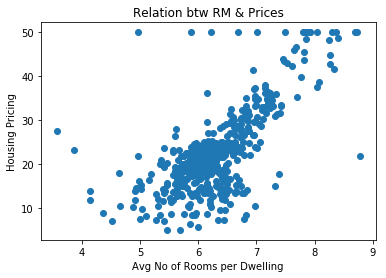

In [26]:
plt.scatter(bos.RM, bos.PRICES)
plt.xlabel('Avg No of Rooms per Dwelling')
plt.ylabel('Housing Pricing')
plt.title('Relation btw RM & Prices')
plt.show()

In [27]:
# As we can see that there is a positive correlation between RM and housing prices
# we pridict the prices 
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

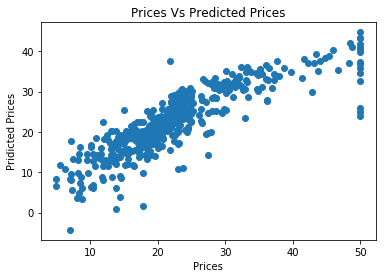

In [28]:
plt.scatter(bos.PRICES, lm.predict(X))
plt.xlabel('Prices')
plt.ylabel('Pridicted Prices')
plt.title('Prices Vs Predicted Prices')
plt.show()

In [29]:
# As we notice some error in  the prediction as the housing prices increase.

# Lets calculate the mean squared error.

mseFull = np.mean((bos.PRICES - lm.predict(X)) **2)
mseFull

21.8977792176875

In [30]:
#Training and validation data sets
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, bos.PRICES, test_size=0.33, random_state=5)

AttributeError: module 'sklearn' has no attribute 'cross_validation'

In [33]:
X_train = X[:-50]
X_test = X[:-50] 
Y_train = bos.PRICES[:-50]
Y_test = bos.PRICES[-50:]
print(X_train.shape)
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(456, 13)
(456,)
(50,)


In [ ]:
# Building a linear regression model using my  train-test data sets.
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train=lm.predict(X_train)
pred_test= lm.predict(X_test)
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train-lm.predict(X_train)) ** 2)
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test-lm.predict(X_test)) ** 2)

In [50]:
#Plotting the Residula Plot 
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train, c='b', s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test)-Y_train, c='b', s=40,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual Plt using Training & Test Data')
plt.ylabel('Residual')

Text(0,0.5,'Residual')